In [1]:
# load the module
%load_ext autoreload
%autoreload 2

## Knapsack

Defining instances
Benchmarking Small Correlated instance
Solving using Dynamic Programming
Solving using Greedy Algorithm
Greedy solution:  [[2, 14], [3, 18]]  with total value:  32  and total weight:  5
Solving using Advanced Greedy Algorithm
Advanced Greedy solution:  [2, 0]  with total value:  48  and total weight:  9
Creating Quantum Instance
Solving using QIRO
Sorted Correlation Dictionary:  [(frozenset({2}), 0.7256290049652293), (frozenset({3}), 0.3219966165202533), (frozenset({2, 3}), 0.17479054497669155), (frozenset({1}), -0.4627636445768037), (frozenset({1, 2}), -0.5095782212627359), (frozenset({1, 3}), -0.6297874711065355)]
single var frozenset({2}). Sign: 1
Current Index:  1
Include item to solution:  1  with weight:  2  and value:  14
Deleting item:  1  with weight:  2  and value:  14
New weight:  7
Optimized expectation values:  frozenset({2})  Step:  1
[[1, 2, 14]]
Sorted Correlation Dictionary:  [(frozenset({2}), 0.9235166030997798), (frozenset({1, 2}), -0.8951495527103

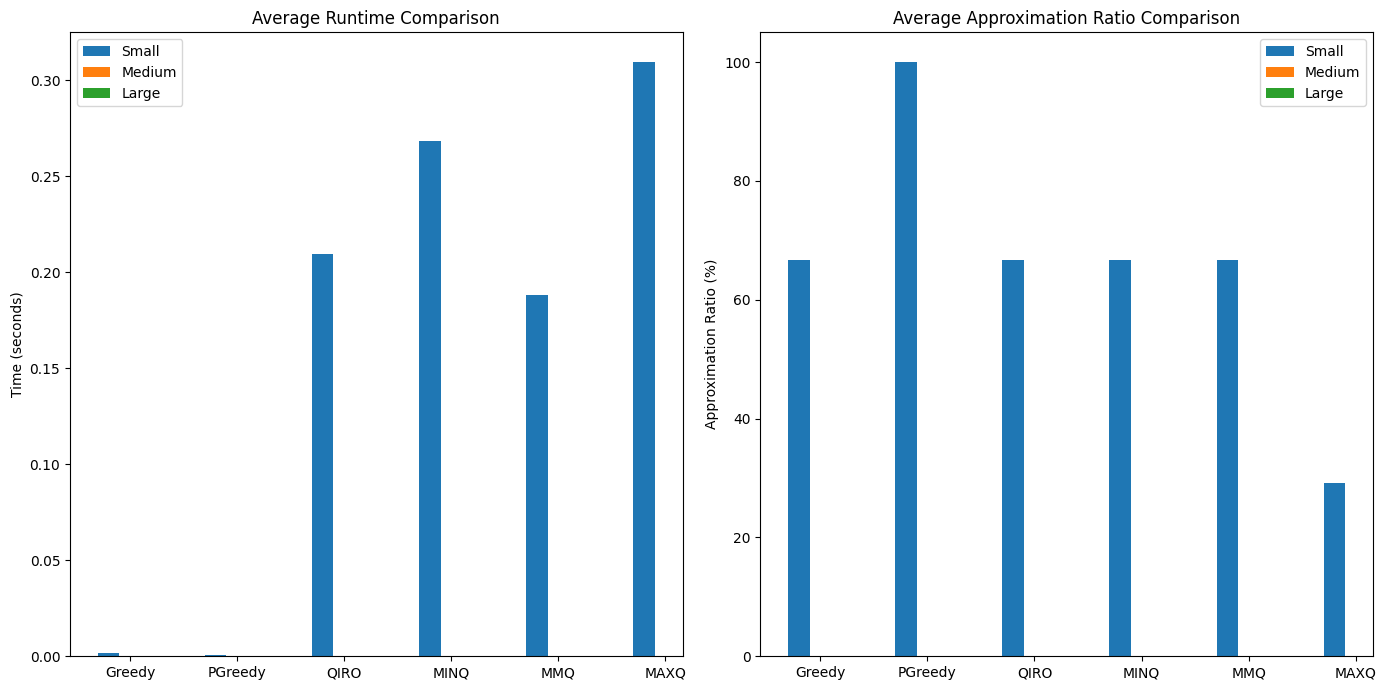

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from expval_calculation.StateVecQAOA import StateVecQAOAExpectationValues
from expval_calculation.SingleLayerQAOAKnapsack import SingleLayerQAOAExpectationValuesKnapsack
from QIRO_Knapsack import QIRO_Knapsack
from problem_generation import Generate_Knapsack as gk
import KnapsackSolver as ks

def run_knapsack_benchmarks():
    """
    Runs benchmarks for various knapsack problem instances using classical and quantum-inspired solvers.
    Generates instances, solves them using different algorithms, and plots the results.
    """
    # Define the types of instances to test
    print("Defining instances")
    instance_types = [
        {"size": 3, "maximum weight": 9, "correlation": "correlated", "label": "Small Correlated", "category": "Small"},
        #{"size": 3, "maximum weight": 9, "correlation": "uncorrelated", "label": "Small Uncorrelated", "category": "Small"},
        #{"size": 10, "maximum weight": 30, "correlation": "correlated", "label": "Small Correlated", "category": "Medium"},
        #{"size": 10, "maximum weight": 30, "correlation": "uncorrelated", "label": "Small Uncorrelated", "category": "Medium"},
        #{"size": 10, "maximum weight": 60, "correlation": "correlated", "label": "Small Correlated", "category": "Small"},
        #{"size": 10, "maximum weight": 60, "correlation": "uncorrelated", "label": "Small Uncorrelated", "category": "Small"},
        #{"size": 10, "maximum weight": 60, "correlation": "correlated", "label": "Small Correlated", "category": "Small"},
        #{"size": 10, "maximum weight": 60, "correlation": "uncorrelated", "label": "Small Uncorrelated", "category": "Small"},
        #{"size": 25, "maximum weight": 50, "correlation": "correlated", "label": "Medium Correlated", "category": "Medium"},
        #{"size": 25, "maximum weight": 50, "correlation": "uncorrelated", "label": "Medium Uncorrelated", "category": "Medium"},
        #{"size": 25, "maximum weight": 50, "correlation": "correlated", "label": "Medium Correlated", "category": "Medium"},
        #{"size": 25, "maximum weight": 50, "correlation": "uncorrelated", "label": "Medium Uncorrelated", "category": "Medium"},
        #{"size": 40, "maximum weight": 70, "correlation": "correlated", "label": "Large Correlated", "category": "Large"},
        #{"size": 40, "maximum weight": 70, "correlation": "uncorrelated", "label": "Large Uncorrelated", "category": "Large"},
        #{"size": 60, "maximum weight": 90, "correlation": "correlated", "label": "Very Large Correlated", "category": "Large"},
        #{"size": 60, "maximum weight": 90, "correlation": "uncorrelated", "label": "Very Large Uncorrelated", "category": "Large"}
    ]

    # Initialize dictionaries to store results grouped by size category
    runtimes = {"Small": {"Greedy": [], "PGreedy": [], "QIRO": [], "MINQ": [], "MMQ": [], "MAXQ": []},
                "Medium": {"Greedy": [], "PGreedy": [], "QIRO": [], "MINQ": [], "MMQ": [], "MAXQ": []},
                "Large": {"Greedy": [], "PGreedy": [], "QIRO": [], "MINQ": [], "MMQ": [], "MAXQ": []}}
                
    ratios = {"Small": {"Greedy": [], "PGreedy": [], "QIRO": [], "MINQ": [], "MMQ": [], "MAXQ": []},
              "Medium": {"Greedy": [], "PGreedy": [], "QIRO": [], "MINQ": [], "MMQ": [], "MAXQ": []},
              "Large": {"Greedy": [], "PGreedy": [], "QIRO": [], "MINQ": [], "MMQ": [], "MAXQ": []}}

    # Define specific colors for each category
    category_colors = {
        "Small": "#1f77b4",   # Blue
        "Medium": "#ff7f0e",  # Orange
        "Large": "#2ca02c"    # Green
    }

    # Generate instances and solve them
    for instance in instance_types:
        
        print(f"Benchmarking {instance['label']} instance")
        category = instance["category"]
        
        # Generate knapsack problem instance
        np.random.seed(42)
        weights = np.random.choice(range(1, instance["maximum weight"]), instance["size"], replace=False)
        if instance["correlation"] == "correlated":
            values = weights + np.random.normal(0, 2, instance["size"]).astype(int)
        else:
            values = np.random.choice(range(1, 200), instance["size"], replace=False)  # Uncorrelated values
        values = np.maximum(1, values)  # Ensure all values are positive
        
        weights = np.array([6,2,3])
        values = np.array([30,14,18])

        # Solve using Dynamic Programming (Optimal Solution)
        print("Solving using Dynamic Programming")
        dp_solver = ks.KnapsackSolver(instance["maximum weight"], weights, values)
        optimal_value, _ = dp_solver.solve()

        # Solve using Greedy Algorithm
        print("Solving using Greedy Algorithm")
        start_time = time.time()
        greedy_value, _, _ = dp_solver.greedy()
        greedy_time = time.time() - start_time
        runtimes[category]["Greedy"].append(greedy_time)
        ratios[category]["Greedy"].append(100 * greedy_value / optimal_value)
        
        print("Solving using Advanced Greedy Algorithm")
        start_time = time.time()
        pgreedy_value, _, _ = dp_solver.advanced_greedy()
        pgreedy_time = time.time() - start_time
        runtimes[category]["PGreedy"].append(pgreedy_time)
        ratios[category]["PGreedy"].append(100 * pgreedy_value / optimal_value)
        
        print("Creating Quantum Instance")
        knap = gk.Knapsack(instance["maximum weight"], weights, values, 42, max(values) + 5, 1)
        
        knap_expval_qiro = SingleLayerQAOAExpectationValuesKnapsack(knap)
        knapsack_qiro = QIRO_Knapsack(nc_input=3, expectation_values_input=knap_expval_qiro, variation="QIRO")
        knap_expval_minq = SingleLayerQAOAExpectationValuesKnapsack(knap) #StateVecQAOAExpectationValues(knap, p=2)
        knapsack_minq = QIRO_Knapsack(nc_input=3, expectation_values_input=knap_expval_minq, variation="MINQ")
        knap_expval_mmq = SingleLayerQAOAExpectationValuesKnapsack(knap) #StateVecQAOAExpectationValues(knap, p=2) 
        knapsack_mmq = QIRO_Knapsack(nc_input=3, expectation_values_input=knap_expval_mmq, variation="MMQ")
        value_sum = lambda this: sum(sub_arr[2] for sub_arr in this.solution)
        knap_expval_maxq = SingleLayerQAOAExpectationValuesKnapsack(knap)
        knapsack_maxq = QIRO_Knapsack(nc_input=3, expectation_values_input=knap_expval_maxq, variation="MAXQ")
        
        
        print("Solving using QIRO")
        start_time = time.time()
        knapsack_qiro.execute()
        qiro_value = value_sum(knapsack_qiro)
        qiro_time = time.time() - start_time
        runtimes[category]["QIRO"].append(qiro_time)
        ratios[category]["QIRO"].append(100 * qiro_value / optimal_value)
        
        print("Solving using MINQ")
        start_time = time.time()
        knapsack_minq.execute()
        minq_value = value_sum(knapsack_minq)
        minq_time = time.time() - start_time
        runtimes[category]["MINQ"].append(minq_time)
        ratios[category]["MINQ"].append(100 * minq_value / optimal_value)
    
        print("Solving using MMQ")
        start_time = time.time()
        knapsack_mmq.execute()
        mmq_value = value_sum(knapsack_mmq)
        mmq_time = time.time() - start_time
        runtimes[category]["MMQ"].append(mmq_time)
        ratios[category]["MMQ"].append(100 * mmq_value / optimal_value)    
        
        print("Solving using MAXQ")
        start_time = time.time()
        knapsack_maxq.execute()
        maxq_value = value_sum(knapsack_maxq)
        maxq_time = time.time() - start_time
        runtimes[category]["MAXQ"].append(maxq_time)
        ratios[category]["MAXQ"].append(100 * maxq_value / optimal_value)
        
        
    print("Benchmarking complete")

    # Calculate averages for each category
    avg_runtimes = {category: {key: np.mean(runtimes[category][key]) for key in runtimes[category]} for category in runtimes}
    avg_ratios = {category: {key: np.mean(ratios[category][key]) for key in ratios[category]} for category in ratios}

    # Plot the results
    categories = ["Small", "Medium", "Large"]
    algorithms = ["Greedy", "PGreedy", "QIRO", "MINQ", "MMQ", "MAXQ"]
    category_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

    plt.figure(figsize=(14, 7))
    
    # Plot runtimes
    plt.subplot(1, 2, 1)
    bar_width = 0.2  # Width of the bars
    index = np.arange(len(algorithms))
    
    for i, category in enumerate(categories):
        runtime_values = [avg_runtimes[category][alg] for alg in algorithms]
        plt.bar(index + i * bar_width, runtime_values, bar_width, label=category, color=category_colors[i])
        
    plt.ylabel('Time (seconds)')
    plt.title('Average Runtime Comparison')
    plt.xticks(index + bar_width, algorithms)
    plt.legend()

    # Plot approximation ratios
    plt.subplot(1, 2, 2)
    for i, category in enumerate(categories):
        ratio_values = [avg_ratios[category][alg] for alg in algorithms]
        plt.bar(index + i * bar_width, ratio_values, bar_width, label=category, color=category_colors[i])
        
    plt.ylabel('Approximation Ratio (%)')
    plt.title('Average Approximation Ratio Comparison')
    plt.xticks(index + bar_width, algorithms)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the benchmark function
run_knapsack_benchmarks()

In [60]:
from problem_generation import Generate_Knapsack as gk
import numpy as np

maxWeight = 25

length = 20
weights = np.random.choice(np.arange(1, 10), size=length, replace=True)
values = np.random.choice(np.arange(1, 100), size=length, replace=True)
seed = 42
A = 110
B = 1
#values = [51, 20, 97, 76, 36, 47]
#weights = [9, 4, 5, 1, 6, 7]

knapsack = gk.Knapsack(maxWeight, weights, values, seed, A, B)

print(knapsack.values)
print(knapsack.weights)

#knapsack.matrix

[22 30 38 51 54  8 27 27 98 21 30 97 28 64 97 69 61 48 19  4]
[2 2 6 3 9 4 1 4 1 5 4 8 8 7 3 1 1 3 6 7]


In [24]:
from expval_calculation.SingleLayerQAOAKnapsack import SingleLayerQAOAExpectationValuesKnapsack
from QIRO_Knapsack import QIRO_Knapsack

knapsack_expval = SingleLayerQAOAExpectationValuesKnapsack(knapsack)
# check if y's still are included in the matrix 
qknapsack = QIRO_Knapsack(nc_input=3, expectation_values_input=knapsack_expval)
qknapsack.execute_QIRO() # 488

Deleting item:  8  with weight:  3  and value:  63
New weight:  25
Deleting item:  17  with weight:  7  and value:  1
New weight:  25
Including both items 4 and 12 to the solution.
Removing items: 4 and 12.
New weight:  7
Include item to solution:  12  with weight:  5  and value:  99
Deleting item:  12  with weight:  5  and value:  99
New weight:  2
Include item to solution:  1  with weight:  1  and value:  11
Deleting item:  1  with weight:  1  and value:  11
New weight:  1
Include item to solution:  0  with weight:  1  and value:  96
Deleting item:  0  with weight:  1  and value:  96
New weight:  0
Optimization finished. Solution: [Index, Weight, Value] [[4, 9, 49], [12, 9, 49], [12, 5, 99], [1, 1, 11], [0, 1, 96]]  with total value:  304  and total weight:  25


In [44]:
import KnapsackSolver as ks

k = ks.KnapsackSolver(maxWeight, weights, values)
print("Dynamic Programming: ", k.solve())

print("Greedy Algorithm: ", k.greedy())

Dynamic Programming:  (739, [[2, 79], [3, 50], [2, 57], [1, 67], [3, 80], [5, 89], [1, 83], [1, 80], [4, 77], [3, 77]])
Greedy Algorithm:  (739, 25, [[1, 83], [1, 80], [1, 67], [2, 79], [2, 57], [3, 80], [3, 77], [4, 77], [5, 89], [3, 50]])
